# Exploratory Data Analysis

In [78]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [79]:
df = pd.read_csv("DATA/global_climate_events_economic_impact_2020_2025.csv")

In [80]:
# dataset information
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("\nColumn Names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())
print("\nLast 5 Rows:\n", df.tail())

Rows: 3000
Columns: 20

Column Names:
 ['event_id', 'date', 'year', 'month', 'country', 'event_type', 'severity', 'duration_days', 'affected_population', 'deaths', 'injuries', 'economic_impact_million_usd', 'infrastructure_damage_score', 'response_time_hours', 'international_aid_million_usd', 'latitude', 'longitude', 'total_casualties', 'impact_per_capita', 'aid_percentage']

Data Types:
 event_id                          object
date                              object
year                               int64
month                              int64
country                           object
event_type                        object
severity                           int64
duration_days                      int64
affected_population                int64
deaths                             int64
injuries                           int64
economic_impact_million_usd      float64
infrastructure_damage_score      float64
response_time_hours                int64
international_aid_million_usd    f

In [81]:
# missing values
print("Missing Values Per Column")
print(df.isnull().sum())

Missing Values Per Column
event_id                         0
date                             0
year                             0
month                            0
country                          0
event_type                       0
severity                         0
duration_days                    0
affected_population              0
deaths                           0
injuries                         0
economic_impact_million_usd      0
infrastructure_damage_score      0
response_time_hours              0
international_aid_million_usd    0
latitude                         0
longitude                        0
total_casualties                 0
impact_per_capita                0
aid_percentage                   0
dtype: int64


In [82]:
# duplicate entries
print("Duplicate Entries")
duplicates = df[df.duplicated()]
print("Number of duplicate entries:", len(duplicates))
if len(duplicates) > 0:
    print("\nSample duplicate rows:\n", duplicates.head())

Duplicate Entries
Number of duplicate entries: 0


In [83]:
# unique values per column
print("\nUnique Values Per Column")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")



Unique Values Per Column
event_id: 3000 unique values
date: 1596 unique values
year: 6 unique values
month: 12 unique values
country: 51 unique values
event_type: 12 unique values
severity: 9 unique values
duration_days: 88 unique values
affected_population: 2994 unique values
deaths: 79 unique values
injuries: 268 unique values
economic_impact_million_usd: 504 unique values
infrastructure_damage_score: 483 unique values
response_time_hours: 54 unique values
international_aid_million_usd: 3 unique values
latitude: 2997 unique values
longitude: 2998 unique values
total_casualties: 270 unique values
impact_per_capita: 791 unique values
aid_percentage: 3 unique values


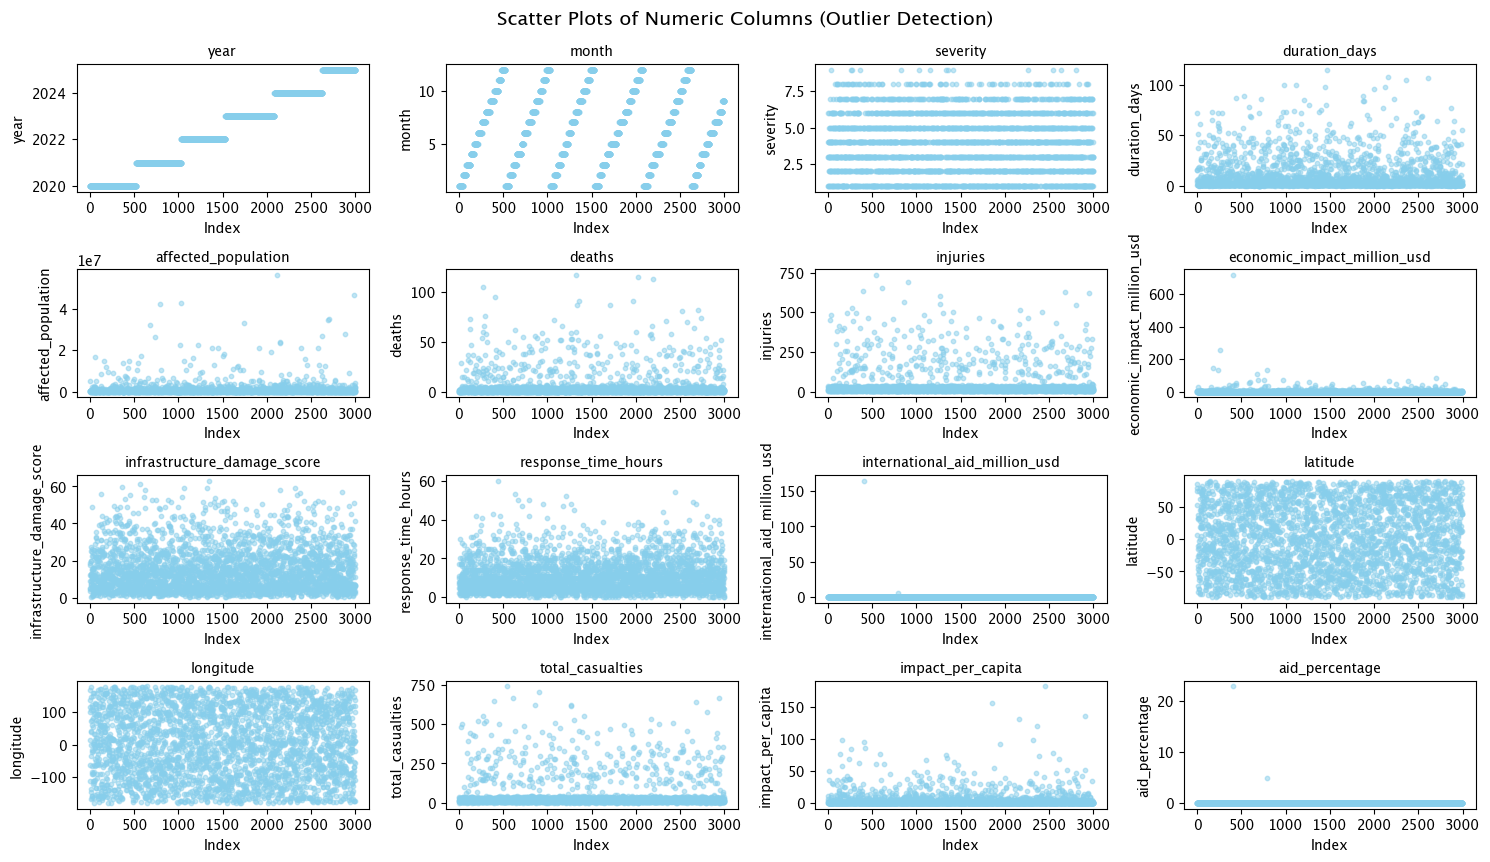

In [84]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 4 + 1, 4, i)
    plt.scatter(range(len(df)), df[col], alpha=0.5, color='skyblue', s=10)
    plt.title(col, fontsize=10)
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.tight_layout()

plt.suptitle("Scatter Plots of Numeric Columns (Outlier Detection)", fontsize=14, y=1.02)
plt.show()

### Outlier Analysis Summary

The scatter plots above show the distribution of each numeric variable across all 3,000 climate events. Each point represents a single event, with the x-axis showing its index position in the dataset.

Overall, the plots reveal that most numeric variables are heavily clustered near lower values, with a few points scattered far from the main group, indicating right-skewed distributions and clear outliers.

- Variables like affected_population, economic_impact_million_usd, injuries, deaths, and total_casualties show several extreme points above the main cluster, representing major disasters that impacted large populations or caused high damage.

- international_aid_million_usd and aid_percentage also have occasional extreme points, suggesting that only a few disasters received substantial international financial support.

- duration_days and infrastructure_damage_score show moderate variation with occasional high values, reflecting a mix of short-term and prolonged disasters.

- year, month, latitude, and longitude appear evenly distributed and do not show true outliers since they are fixed or geographic identifiers.

In summary, these scatter plots confirm that the dataset contains realistic, meaningful outliers corresponding to rare but severe natural disasters. Most climate events have small-scale impacts, while a small number of extreme events dominate in terms of population affected and economic loss.


In [85]:
print("\nNumeric Summary")
print(df.describe())


Numeric Summary
              year        month     severity  duration_days  \
count  3000.000000  3000.000000  3000.000000    3000.000000   
mean   2022.401667     6.260333     3.786333       8.783000   
std       1.653857     3.367146     2.005165      14.714508   
min    2020.000000     1.000000     1.000000       0.000000   
25%    2021.000000     3.000000     2.000000       1.000000   
50%    2022.000000     6.000000     4.000000       2.000000   
75%    2024.000000     9.000000     5.000000       9.000000   
max    2025.000000    12.000000     9.000000     115.000000   

       affected_population       deaths     injuries  \
count         3.000000e+03  3000.000000  3000.000000   
mean          8.685505e+05     4.615000    39.228333   
std           3.009690e+06    11.021491    78.812194   
min           6.220000e+02     0.000000     0.000000   
25%           5.451775e+04     1.000000    10.000000   
50%           1.784770e+05     2.000000    18.000000   
75%           6.082012e

In [86]:
print("\nCategorical Summary")
print(df.describe(include=['object']))


Categorical Summary
       event_id        date country  event_type
count      3000        3000    3000        3000
unique     3000        1596      51          12
top     EV01539  2021-09-23   Japan  Earthquake
freq          1           7      86         287


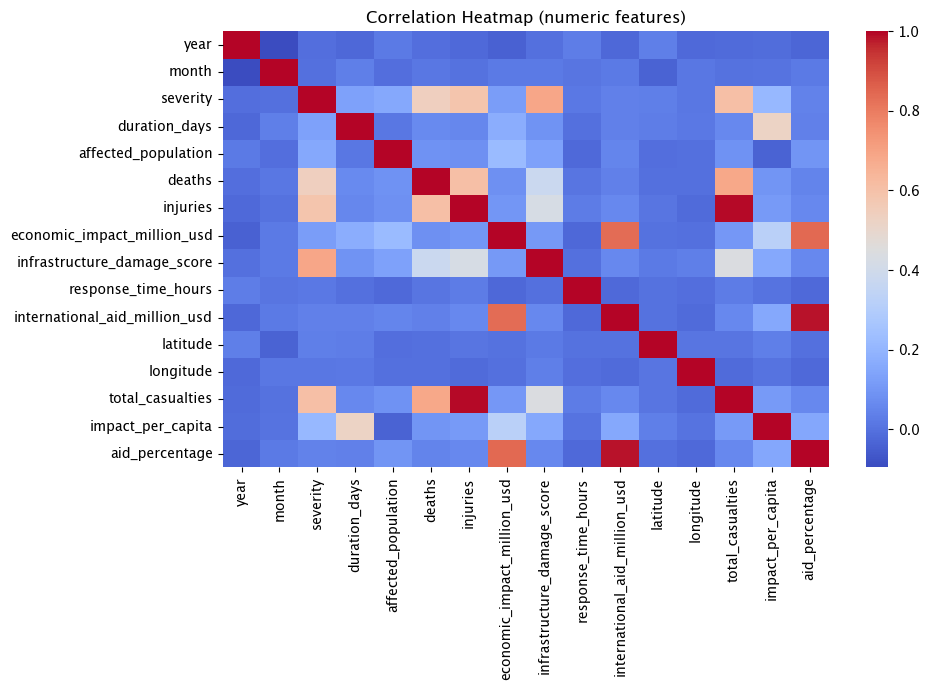

In [87]:
# correlation heatmap for numeric columns
corr = df[numeric_cols].corr(numeric_only=True)
plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (numeric features)")
plt.tight_layout()
plt.show()

### Correlation Heatmap Summary

The heatmap shows how numeric variables are related in the dataset. Darker red areas indicate strong positive correlations, while blue areas represent weak or negative correlations.

- Most variables have weak to moderate correlations, meaning the dataset contains diverse information without much redundancy.

- Deaths, injuries, and total_casualties are strongly correlated, which is expected since total casualties combine the other two.

- Economic_impact_million_usd is moderately correlated with infrastructure_damage_score and affected_population, showing that events with higher damage and larger populations tend to cause greater economic losses.

- Severity and duration_days have a weak positive correlation, suggesting that longer events are often slightly more severe.

- Impact_per_capita shows mild correlation with both economic impact and affected population, indicating that larger-scale disasters increase individual-level impact.

- International_aid_million_usd and aid_percentage are moderately correlated with other impact measures, implying that higher-impact events typically attract more aid.

Overall, the dataset has a balanced correlation structure with some meaningful relationships but no major multicollinearity concerns.

In [88]:
# group by event_type and calculate mean of key metrics
if "event_type" in df.columns:
    grouped_evt = (df
        .groupby("event_type")[["severity","duration_days","affected_population",
                                "economic_impact_million_usd","total_casualties"]]
        .mean()
        .sort_values("economic_impact_million_usd", ascending=False)
        .round(2))
    print("\n Mean metrics by event_type")
    print(grouped_evt.head(10))



 Mean metrics by event_type
            severity  duration_days  affected_population  \
event_type                                                 
Heatwave        4.62          28.29           1019488.01   
Drought         4.51          25.87           1454821.28   
Cold Wave       4.52          28.40            798377.62   
Flood           4.42           5.63            997872.75   
Wildfire        4.48           5.12           1081802.05   
Hurricane       2.58           4.87            651975.46   
Tornado         4.44           1.61           1014405.01   
Landslide       4.53           1.56            848693.74   
Hailstorm       4.40           1.59            938092.64   
Tsunami         2.46           1.63            616048.94   

            economic_impact_million_usd  total_casualties  
event_type                                                 
Heatwave                           9.18             69.03  
Drought                            5.10             56.68  
Cold Wave 


=== Top 15 countries by total economic impact (USD millions) ===
country
United States     1723.14
China              718.68
Japan              470.01
France             292.04
India              253.43
Italy              226.66
Germany            196.88
Brazil             136.37
Canada             129.99
United Kingdom     121.90
Russia             120.66
Australia           94.28
Netherlands         93.97
Indonesia           78.65
Thailand            68.01
Name: economic_impact_million_usd, dtype: float64


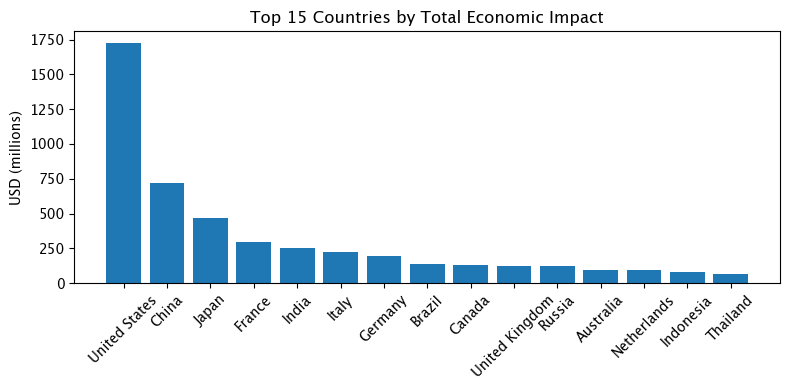

In [89]:
# grouped by country and sum economic impact
if "country" in df.columns and "economic_impact_million_usd" in df.columns:
    by_cty = (df.groupby("country")["economic_impact_million_usd"]
                .sum()
                .sort_values(ascending=False)
                .head(15))
    print("\n=== Top 15 countries by total economic impact (USD millions) ===")
    print(by_cty)

    plt.figure(figsize=(8,4))
    plt.bar(by_cty.index, by_cty.values)
    plt.title("Top 15 Countries by Total Economic Impact")
    plt.ylabel("USD (millions)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()